## Perkenalan

====================================================

Nama : Panji Putra Rianto  

Link Tableau : https://public.tableau.com/app/profile/panji.putra/viz/VideoGamesSalesAnalysis_17049738886700/Dashboard1?publish=yes

Program ini dibuat untuk melakukan analisis data terkait data penjualan video game
dan mendapatkan insight yang akan berpengaruh untuk strategi perusahaan di masa depan.

====================================================

## Identifikasi Masalah

Sebagai seorang Data Analyst, saya diminta oleh sebuah studio game yang sedang ingin merancang sebuah video game untuk melakukan analisa terkait data penjualan video game beberapa tahun terakhir. Dikarenakan biaya yang dibutuhkan untuk membuat video game sangatlah besar, analisis data sangat dibutuhkan sebelum dimulainya proses pembuatan game untuk mengatur strategi game seperti apa yang akan bisa mendapatkan penjualan yang tinggi di masyarakat. Untuk menganalisa data, dataset yang akan diolah berasal dari link ini :  
https://www.kaggle.com/datasets/gregorut/videogamesales

## SMART

Specific = Meningkatkan penjualan video game terbaru dari studio.
    
Measurable = Meningkatkan keuntungan studio game hingga 50% dari penjualan video game. 
   
Achievable = Dengan menganalisa data yang ada, nantinya kita bisa merancang strategi pembuatan video game berdasarkan hasil dari analisa.  
    
Relevant = Menjadikan video game yang memiliki penjualan yang tinggi untuk dijadikan acuan sebelum pembuatan video game.  
  
Time-bound = Mendapatkan penjualan yang tinggi pada game yang akan dirilis 1 tahun dari sekarang.  


## 5W1H

1. Apa 5 game yang dengan penjualan global paling tinggi?
2. Apa genre game yang paling banyak terjual?
3. Di platform apa penjualan game paling tinggi?
4. Dimana region yang memiliki penjualan tertinggi?
5. Bagaimana hubungan antara platform dengan banyaknya terjual?
6. Apakah terdapat perbedaan dari penjualan pada tiap region



## Data Loading

In [3]:
# Import library
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# Membaca file csv
df = pd.read_csv("vgsales.csv")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Setelah meload data terlihat bahwa terdapat 16598 baris dengan 11 kolom

In [63]:
# Mencari unique value dari kolom
print(len(df ["Genre"].unique()))
df['Genre'].unique()


12


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Ditemukan terdapat 12 unique value pada kolom Genre yaitu 'Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'

In [15]:
# Mencari unique value dari kolom
print(len(df ["Platform"].unique()))
df['Platform'].unique()

31


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Terdapat 31 unique value pada kolom Platform.

In [48]:
# Mencari unique value dari kolom
print(len(df ["Year"].unique()))
sorted(df['Year'].unique())

39


[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020]

Terdapat 40 unique value pada kolom Year. Dapat dilihat bahwa setelah tahun 2017 datanya tidak lengkap, hanya tersedia data untuk video game pada tahun 2020 dan tidak terdapat data untuk tahun 2018 dan 2019. Data video gamenya sendiri dimulai dari tahun 1980 yang mana sudah terlalu lama dan tidak relevan dengan dunia game jaman sekarang. Untuk itu, datanya akan dibatasi hanya untuk data video game dari 5 tahun terakhir.

In [73]:
range_Tahun = df[(df['Year'] >= 2010) & (df['Year'] <= 2020)]

# Count occurrences of each year and store in a list
hitung_tahun = range_Tahun['Year'].value_counts().sort_index().tolist

print(hitung_tahun)

<bound method IndexOpsMixin.tolist of Year
2010    1257
2011    1136
2012     655
2013     546
2014     580
2015     614
2016     342
2017       3
2020       1
Name: count, dtype: int64>


Dapat terlihat bahwa data setelah tahun 2015 terdapat perbedaan yang drastis. Untuk itu data yang akan diambil hanya data dari tahun 2011 hingga 2015.

## Data Cleaning

In [65]:
# Melakukan pengecekan null
df.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Setelah dilakukan pengecekan terdapat null pada data dan akan dilakukan cleaning.

In [66]:
# Melakukan drop pada null
df = df.dropna()
df.isnull().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Setelah dilakukan cleaning sudah tidak terdapat null pada values.

In [67]:
# Melakukan pengecekan duplicate
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16291, dtype: bool

Dilakukan pengecekan terhadap duplicate pada data dan tidak ditemukan adanya duplicate.

In [68]:
# Mengubah datatype pada kolom 'Year' ke integer
df['Year'] = df['Year'].astype(int)

# Menghapus kolom Rank
df.drop('Rank', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


C:\Users\crewx\AppData\Local\Temp\ipykernel_8180\3960724745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)
C:\Users\crewx\AppData\Local\Temp\ipykernel_8180\3960724745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Rank', axis=1, inplace=True)


Karena kolom 'Year' memiliki data type float dan kita tidak butuh data type tersebut pada kolom 'Year', maka kita lakukan perubahan data type ke integer untuk kolom tersebut. Untuk analisis data kita tidak membutuhkan kolom rank, maka kita lakukan penghapusan terhadap kolom tersebut. 

In [79]:
# Membuat variabel baru untuk data game yang ada diatas tahun 2010 dan dibawah tahun 2016
df1 = df[(df['Year'] > 2010) & (df['Year'] < 2016)]
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
32,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
...,...,...,...,...,...,...,...,...,...,...
16567,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16571,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,Prototype,0.00,0.00,0.01,0.00,0.01
16578,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16581,Fit & Fun,Wii,2011,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


Membuat variabel baru untuk data yang hanya terdapat pada tahun 2010 hingga 2015

In [80]:
# Melakukan export ke csv
df1 = df1.to_csv('vgsales_clean.csv', index=False)

## Analysis

In [4]:
# Membaca data dari file csv
df2 = pd.read_csv('vgsales_clean.csv')
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
4,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
...,...,...,...,...,...,...,...,...,...,...
3526,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
3527,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,Prototype,0.00,0.00,0.01,0.00,0.01
3528,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
3529,Fit & Fun,Wii,2011,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


Terlihat bahwa jumlah rows dan columnnya berkurang dibandingkan sebelum dilakukan cleaning.

In [3]:
# Memunculkan value unique dari kolom year
print(len(df2 ["Year"].unique()))
sorted(df2['Year'].unique())

5


[2011, 2012, 2013, 2014, 2015]

Terlihat dari nilai unique pada kolom "Year" hanya tersisa 5 tahun yaitu 2011, 2012, 2013, 2014, 2015.

### Mencari 5 game dengan penjualan global paling tinggi.

In [5]:
# Melakukan group by dan sorting value untuk mencari game dengan penjualan Global Sales tertinggi
top_selling_games = df2.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(5).reset_index()

top_selling_games


,Name,Global_Sales
0,Grand Theft Auto V,55.92
1,Call of Duty: Modern Warfare 3,30.83
2,Call of Duty: Black Ops II,29.72
3,Call of Duty: Ghosts,27.38
4,Call of Duty: Black Ops 3,25.32


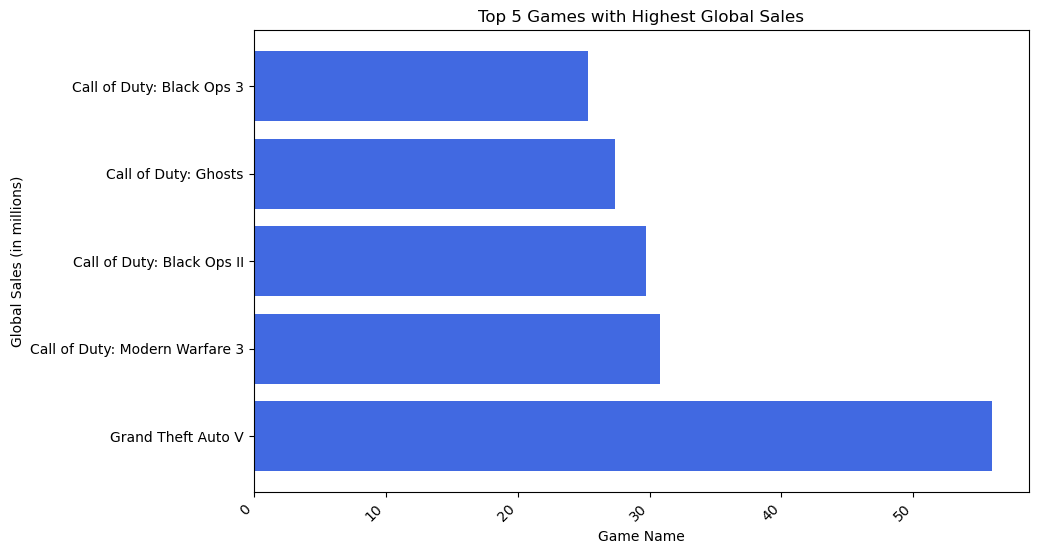

In [5]:
# Membuat sebuah barchart
plt.figure(figsize=(10, 6))
plt.barh(top_selling_games['Name'], top_selling_games['Global_Sales'], color='royalblue')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 5 Games with Highest Global Sales')
plt.xticks(rotation=45, ha='right') 

plt.show()

Dapat terlihat bahwa Grand Theft Auto V	yang dirilis pada tahun 2013 merupakan game dengan penjualan tertinggi, dengan jumlah pendapatan 55.92 Million. Sangat berbeda jauh dengan 4 game teratas lainnya. Grand Theft Auto V sendiri merupakan sebuah game dengan genre Action dan dirilis pada Platform PS3 dan X360

### Mencari genre game yang paling banyak terjual

In [6]:
# Melakukan pencarian terhadap genre dengan Global Sales paling tinggi
top_selling_genres = df2.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

top_selling_genres

,Genre,Global_Sales
0,Action,535.91
1,Shooter,367.17
2,Role-Playing,228.39
3,Sports,217.67
4,Misc,140.02
5,Racing,87.11
6,Platform,86.70
7,Fighting,63.33
8,Simulation,48.48
9,Adventure,42.67


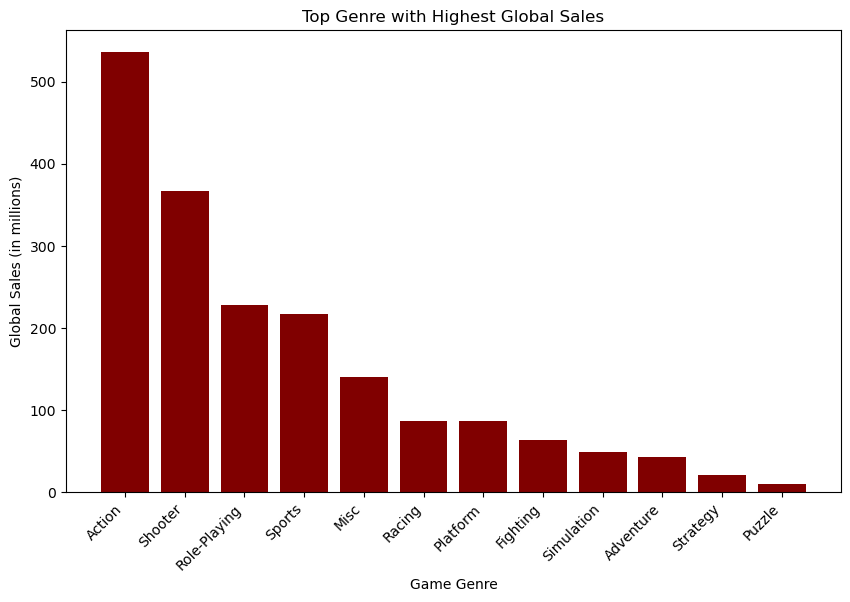

In [7]:
# Membuat sebuah barchart untuk Genre dengan penjualan paling tinggi
plt.figure(figsize=(10, 6))
plt.bar(top_selling_genres['Genre'], top_selling_genres['Global_Sales'], color='maroon')
plt.xlabel('Game Genre')
plt.ylabel('Global Sales (in millions)')
plt.title('Top Genre with Highest Global Sales')
plt.xticks(rotation=45, ha='right') 

plt.show()

Diketahui bahwa genre Action menempati posisi teratas sebagai genre dengan penjualan global paling tinggi, dengan penjualan total sebesar 535.91 Million. Sedangkan, genre Puzzle merupakan genre dengan penjualan paling sedikit dengan penjualan total hanya 10.05 Million.

### Mencari di platform apa penjualan game paling tinggi

In [17]:
# Mencari platform dengan penjualan paling tinggi
top_platforms = df2.groupby('Platform')['Global_Sales'].sum().nlargest(5)

top_platforms

Platform
PS3     455.43
X360    385.07
3DS     239.67
PS4     238.82
XOne    128.69
Name: Global_Sales, dtype: float64

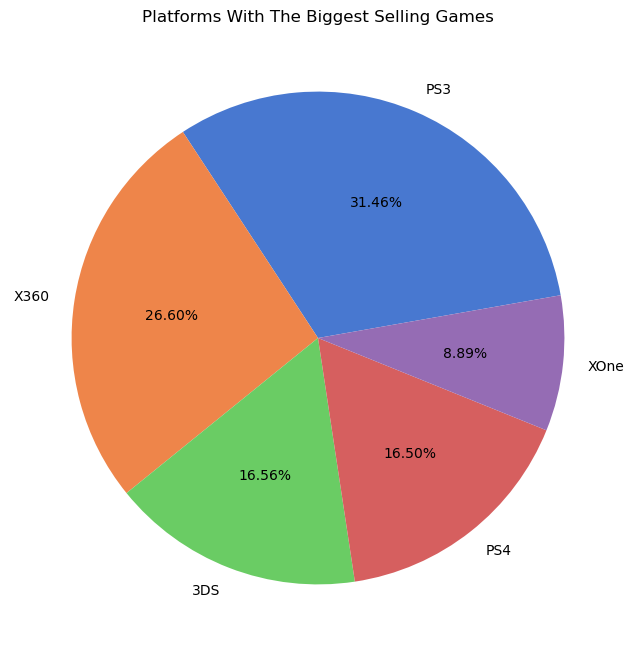

In [19]:
# Membuat pie chart dengan sea born
plt.figure(figsize=(8, 8))
sns.set_palette("muted")
plt.pie(top_platforms, labels=top_platforms.index, autopct='%.2f%%', startangle=10)
plt.title('Platforms With The Biggest Selling Games')

plt.show()

Diketahui bahwa PS3 merupakan Platform dengan penjualan game paling tinggi dengan total penjualan mencapai 455.43 Million menguasai 31.46% dibandingkan platform lain, Diikuti dengan X360 dengan penjualan 385.07 Million. Platform dengan penjualan game paling rendah adalah XOne dengan hanya penjualan 128.69 Million dan hanya menguasai 8.89% dibanding Platform lain.

### Mencari region yang memiliki penjualan tertinggi

In [10]:
# Memlakukan pengelompokan berdasarkan Genre dan melakukan penjumlahan terhadap penjualan pada tiap region
genre_region = df2[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre_region_sales = genre_region.groupby(by=['Genre']).sum()
genre_region_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,221.56,194.16,56.35,63.73
Adventure,14.00,13.46,10.87,4.28
Fighting,29.89,15.50,11.60,6.35
Misc,70.07,40.79,16.44,12.75
Platform,37.52,29.25,11.96,7.94
Puzzle,2.84,3.57,2.91,0.71
Racing,31.03,39.85,5.60,10.56
Role-Playing,77.63,58.76,73.10,18.80
Shooter,177.09,134.84,10.81,44.29


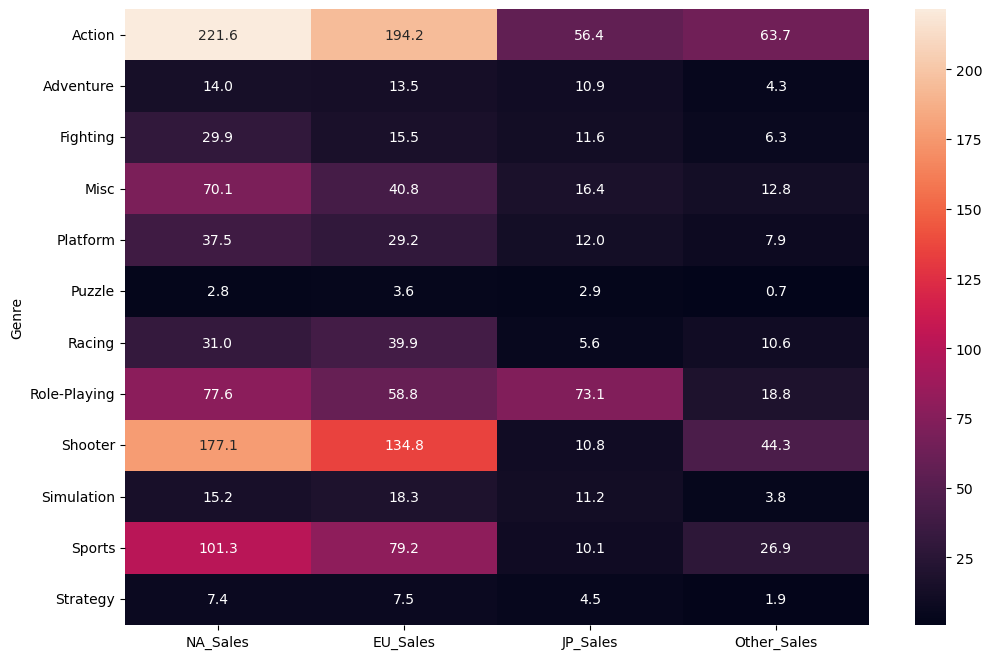

In [11]:
# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(genre_region_sales, annot=True, fmt=".1f")
plt.show()

Diketahui bahwa region NA (North America) memiliki total penjualan paling tinggi untuk mayoritas Genre kecuali Genre Puzzle, Racing, Simulation dan Strategy. Region EU (Europe) memiliki penjualan paling tinggi untuk game dengan Genre Puzzle, Racing, Simulation dan Strategy.

## Analisis Statistik Deskriptif

### Apakah terdapat hubungan antara platform dengan banyaknya terjual?

Untuk mencari tahu apakah Platform mempengaruhi Global Sales, dilakukan analisa menggunakan spearman dengan hipotesis sebagai berikut:

<b>H0 = Tidak terdapat korelasi antara Platform dan Global Sales </b>

<b>H1 = Terdapat korelasi antara Platform dan Global Sales</b>

In [6]:
# Memperhitungkan korelasi menggunakan spearmen
corr_rho, pval_s = stats.spearmanr(df2['Platform'], df2['Global_Sales'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.11, p-value: 5.194768550625423e-11


Nilai p-value 5.194768550625423e-11 lebih kecil dari tingkat signifikansi 0.05 yang berarti kita memiliki cukup bukti untuk menolak hipotesis 0 dan berarti hipotesis 1 berlaku yang artinya terdapat korelasi antara Platform dengan Global Sales. Meskipun rho-correlation 0.11 menunjukan adanya korelasi positif yang lemah. Pada analisis sebelumnya, kita bisa melihat bahwa platform PS3 memiliki total penjualan yang lebih tinggi dibandingkan dengan platform lain. Hal tersebut bisa menjadi bukti bahwa hipotesis 1 memang tepat, yaitu terdapat korelasi antara Platform dan Global Sales.

## Analisis Statistik Inferensial

### Mencari apakah terdapat perbedaan dari penjualan pada tiap region

Untuk mencari tahu apakah terdapat perbedaan dari penjualan pada tiap region, akan dilakukan analisa menggunakan anova dengan hipotesis sebagai berikut:

<b>H0 = Tidak terdapat perbedaan penjualan antar region </b>

<b>H1 = Terdapat perbedaan dari penjualan antar region</b>


In [7]:
# Memperhitungkan korelasi menggunakan anova
res = stats.f_oneway(df2['NA_Sales'], df2['EU_Sales'], df2['JP_Sales'], df2['Other_Sales'])
print('p-value:',res.pvalue)


p-value: 3.639742050866311e-91


Nilai p-value adalah 3.639742050866311e-91 lebih kecil dari tingkat signifikansi 0.05 yang berarti, kita telah menolak hipotesis 0 dan yang berlaku adalah hipotesis 1 yaitu terdapat perbedaan dari penjualan antar region. Jika kita lihat pada analisa sebelumnya, terlihat bahwa Region NA memiliki penjualan paling tinggi untuk mayoritas Genre game dibandingkan dengan region-region lainnya. Hal ini juga yang membantu memperkuat hipotesis 1.

## Kesimpulan

Dari hasil analisa data, kita dapat mengambil beberapa kesimpulan untuk meningkatkan penjualan video game sebagai berikut: 

1. Studio bisa berfokus pada game dengan Genre Action, terbukti dari hasil analisis bahwa Genre game action merupakan genre dengan penjualan paling tinggi dengan Global Sales sejumlah 535.91 Million. Hal ini juga didukung dengan Game dengan penjualan global paling tinggi adalah Grand Theft Auto V yang merupakan sebuah game dengan Genre Action. Jika dibandingkan dengan Genre Puzzle yang hanya memiliki Global Sales 10.05 Million, jelas membuat game dengan Genre Action pasti akan mendapatkan lebih banyak penjualan.

2. Untuk merilis game, studio bisa memprioritaskan untuk merilis pada platform PS3 karena platform tersebut merupakan platform dengan penjualan paling tinggi dengan nilai mencapai 455.43 Million. Hal ini diperkuat dari analisis statistik yang dilakukan, dimana terdapat korelasi antara Platform dengan Global Sales. 

3. Untuk perilisan di Region mana akan menjual video game bisa dipertimbangkan untuk menjual pada Region NA (North America). Berdasarkan dari hasil analisa, Region ini memuncaki posisi dengan Region yang memiliki penjualan paling tinggi untuk mayoritas Genre. Setelah dilakukan analisis statistik juga ditemukan bahwa terdapat perbedaan dari penjualan antar region.

Dengan adanya analisis ini, diharapkan perusahaan bisa menyusun strategi yang lebih tepat kedepannya untuk bisa meningkatkan keuntungan hingga 50% dari penjualan video game.
